<a href="https://colab.research.google.com/github/kartikay89/Data-Analysis/blob/main/ClimateChange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Climate Change Data**

Source:
1. https://www.kaggle.com/theworldbank/world-bank-climate-change-data

In [1]:
import pandas as pd
# Bar chart
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Multiple sheets within an Excel file are accessed below.**

In [3]:
# Country specific data
Country_specific = pd.ExcelFile('/content/drive/MyDrive/Google Colab Data /climate-change-excel-4-6-mb-.xls')
Country_specific_Data = pd.read_excel(Country_specific, 'Data')
Country_specific_Series = pd.read_excel(Country_specific, 'Series')

In [4]:
# Historical data
historical_data = pd.ExcelFile('/content/drive/MyDrive/Google Colab Data /historical-data-excel-380-kb-.xls')
Country_temperature = pd.read_excel(historical_data, 'Country_temperatureCRU')
Country_precipitation = pd.read_excel(historical_data, 'Country_precipitationCRU')

**Accessing all datasets**

In [5]:
Country_specific_Data.head()

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,29.5748,..,..,..,..,..,..,..,..,..,29.5748,..,..,..,..,..,..,..,..,..,..,..
1,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,..,..,..,..,..,..,0,..,..,..,..,..,..,..,..,..,..,..
2,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,..,..,..,..,..,..,0,..,..,..,..,..,..,..,..,..,..,..
3,AGO,Angola,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.208235,..,..,..,..,..,..,..,..,..,0.208235,..,..,..,..,..,..,..,..,..,..,..
4,ALB,Albania,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,4.96788,..,..,..,..,..,..,..,..,..,4.96788,..,..,..,..,..,..,..,..,..,..,..


In [6]:
Country_specific_Series.head()

,Series code,Series name,Scale,Decimals,Order,Topic,Definition,Source
0,SP.POP.TOTL,Population,0,0,1,Size of the economy,Population includes all residents who are pres...,(1) United Nations Population Division. 2011. ...
1,SP.POP.GROW,Population growth (annual %),0,1,2,Size of the economy,Annual population growth rate for year t is th...,Derived from total population. Population sour...
2,NY.GDP.MKTP.CD,GDP ($),0,0,3,Size of the economy,GDP is gross domestic product and measures the...,"World Bank national accounts data, and OECD Na..."
3,NY.GNP.PCAP.CD,GNI per capita (Atlas $),0,0,4,Size of the economy,"GNI per capita is the gross national income, c...","World Bank national accounts data, and OECD Na..."
4,EN.CLC.MMDT.C,"Average daily min/max temperature (1961-1990, ...",Text,Text,5,Climate,Average daily min/max temperature are the mini...,"Mitchell, T.D., Carter, T.R., Jones, P.D., Hul..."


In [7]:
Country_temperature.head()

,ISO_3DIGIT,Jan_Temp,Feb_temp,Mar_temp,Apr_Temp,May_temp,Jun_Temp,July_Temp,Aug_Temp,Sept_temp,Oct_temp,Nov_Temp,Dec_temp,Annual_temp
0,AFG,0.073058,2.109406,7.596974,13.370239,18.216310,23.201315,25.258537,23.766517,19.034575,12.992646,7.004094,2.433517,12.921455
1,AGO,22.582236,22.683536,22.784139,22.353582,20.739575,18.373315,17.946175,19.902466,22.187548,23.181599,22.786151,22.610858,21.510933
2,ALB,2.023067,3.218058,6.035317,9.917867,14.442750,17.927750,20.538917,20.479667,17.159083,12.265775,7.575808,3.653617,11.269800
3,ARE,18.427522,19.428044,22.612913,26.578435,30.623652,32.457087,33.796130,33.550869,31.743130,28.343218,24.061783,20.283739,26.825609
4,ARG,20.803533,19.899523,17.514634,14.046284,10.647732,7.657256,7.421399,9.015955,11.529476,14.674651,17.544032,19.828148,14.215225


In [16]:
Country_precipitation.head()

,ISO_3DIGIT,Jan_precip,Feb_precip,Mar_precip,Apr_precip,May_precip,Jun_precip,July_precip,Aug_precip,Sept_precip,Oct_precip,Nov_precip,Dec_precip,Annual_precip
0,AFG,43.275641,49.184578,64.971418,49.406624,24.182488,4.559185,8.034326,7.736403,3.667420,9.355273,15.409127,31.539374,311.321856
1,AGO,154.987404,148.544214,169.914693,109.072267,15.142675,0.372332,0.321137,3.413405,20.102274,69.766698,144.510161,155.158423,991.305683
2,ALB,107.999418,102.625834,93.433083,86.162500,74.273917,54.579168,39.075000,45.696333,67.568500,105.261417,138.264167,138.295834,1053.235184
3,ARE,5.955387,22.178000,16.587609,8.961470,1.080574,1.094061,2.284059,1.405504,0.495943,0.428552,1.740576,5.600291,67.812025
4,ARG,68.370440,63.654088,69.531037,46.481148,36.282154,28.080046,25.894385,24.096768,30.073554,47.715487,55.566664,63.300102,559.045871


In [14]:
# Filtering the dataset for country and codes.
Country_code_namesDF = Country_specific_Data.filter(['Country code', 'Country name'])

# Merging the dataframes on precipitation and temperature with country names

# Country temperature
Country_temperature_DF = Country_temperature.rename(columns={'ISO_3DIGIT': 'Country code'})
Country_temperature_DFV1 = Country_temperature_DF.merge(Country_code_namesDF, how='left')
# Drop duplicates
Country_temperature_DFV2 = Country_temperature_DFV1.drop_duplicates()
Country_temperature_DFV2

,Country code,Jan_Temp,Feb_temp,Mar_temp,Apr_Temp,May_temp,Jun_Temp,July_Temp,Aug_Temp,Sept_temp,Oct_temp,Nov_Temp,Dec_temp,Annual_temp,Country name
0,AFG,0.073058,2.109406,7.596974,13.370239,18.216310,23.201315,25.258537,23.766517,19.034575,12.992646,7.004094,2.433517,12.921455,Afghanistan
58,AGO,22.582236,22.683536,22.784139,22.353582,20.739575,18.373315,17.946175,19.902466,22.187548,23.181599,22.786151,22.610858,21.510933,Angola
116,ALB,2.023067,3.218058,6.035317,9.917867,14.442750,17.927750,20.538917,20.479667,17.159083,12.265775,7.575808,3.653617,11.269800,Albania
174,ARE,18.427522,19.428044,22.612913,26.578435,30.623652,32.457087,33.796130,33.550869,31.743130,28.343218,24.061783,20.283739,26.825609,United Arab Emirates
232,ARG,20.803533,19.899523,17.514634,14.046284,10.647732,7.657256,7.421399,9.015955,11.529476,14.674651,17.544032,19.828148,14.215225,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9464,VUT,25.331500,25.445000,25.228500,24.476500,23.520000,22.793500,22.235001,22.216500,22.487000,23.263500,24.276500,24.811501,23.840500,Vanuatu
9522,YEM,18.352981,19.253071,20.816974,23.554974,25.859500,27.802786,26.982864,26.776929,26.128136,23.016221,20.303857,19.037623,23.157169,"Yemen, Rep."
9580,ZAF,23.194247,22.655704,21.102496,17.741858,14.241581,11.162377,11.071015,12.974351,16.029367,18.310131,20.480351,22.199018,17.596873,South Africa
9638,ZMB,22.887856,22.936512,22.901632,21.911092,19.580152,17.362052,17.067240,19.471812,22.917512,24.669040,24.192320,23.112300,21.584132,Zambia


**Plotting the temperatures on bar charts**

In [39]:
temperatureDF = Country_temperature_DFV2.rename(columns={'Country name': ''})
temperatureDFV1 = temperatureDF.set_index(temperatureDF.iloc[:, -1])
temperatureDFV2 = temperatureDFV1.drop(temperatureDFV1.columns[-1], axis=1)
temperatureDFV3 = temperatureDFV2.drop(temperatureDFV2.columns[-1], axis=1)
temperatureDFV3.head()

,Country code,Jan_Temp,Feb_temp,Mar_temp,Apr_Temp,May_temp,Jun_Temp,July_Temp,Aug_Temp,Sept_temp,Oct_temp,Nov_Temp,Dec_temp
,,,,,,,,,,,,,
Afghanistan,AFG,0.073058,2.109406,7.596974,13.370239,18.216310,23.201315,25.258537,23.766517,19.034575,12.992646,7.004094,2.433517
Angola,AGO,22.582236,22.683536,22.784139,22.353582,20.739575,18.373315,17.946175,19.902466,22.187548,23.181599,22.786151,22.610858
Albania,ALB,2.023067,3.218058,6.035317,9.917867,14.442750,17.927750,20.538917,20.479667,17.159083,12.265775,7.575808,3.653617
United Arab Emirates,ARE,18.427522,19.428044,22.612913,26.578435,30.623652,32.457087,33.796130,33.550869,31.743130,28.343218,24.061783,20.283739
Argentina,ARG,20.803533,19.899523,17.514634,14.046284,10.647732,7.657256,7.421399,9.015955,11.529476,14.674651,17.544032,19.828148


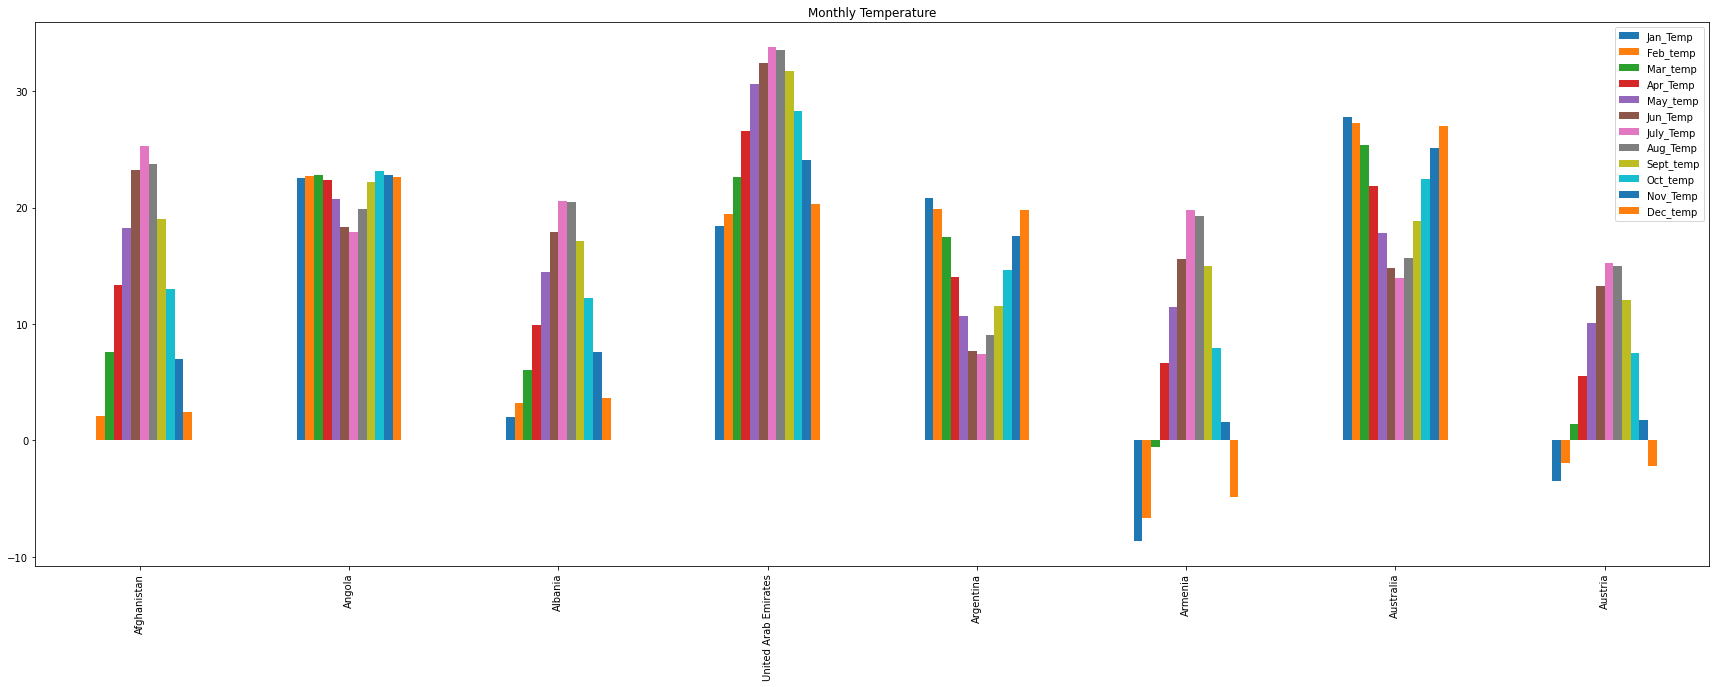

In [40]:
temperatureDFV3.iloc[:8].plot.bar(rot=90, figsize=(30,10))
plt.ticklabel_format(style='plain', axis='y')
plt.title('Monthly Temperature')
plt.show()

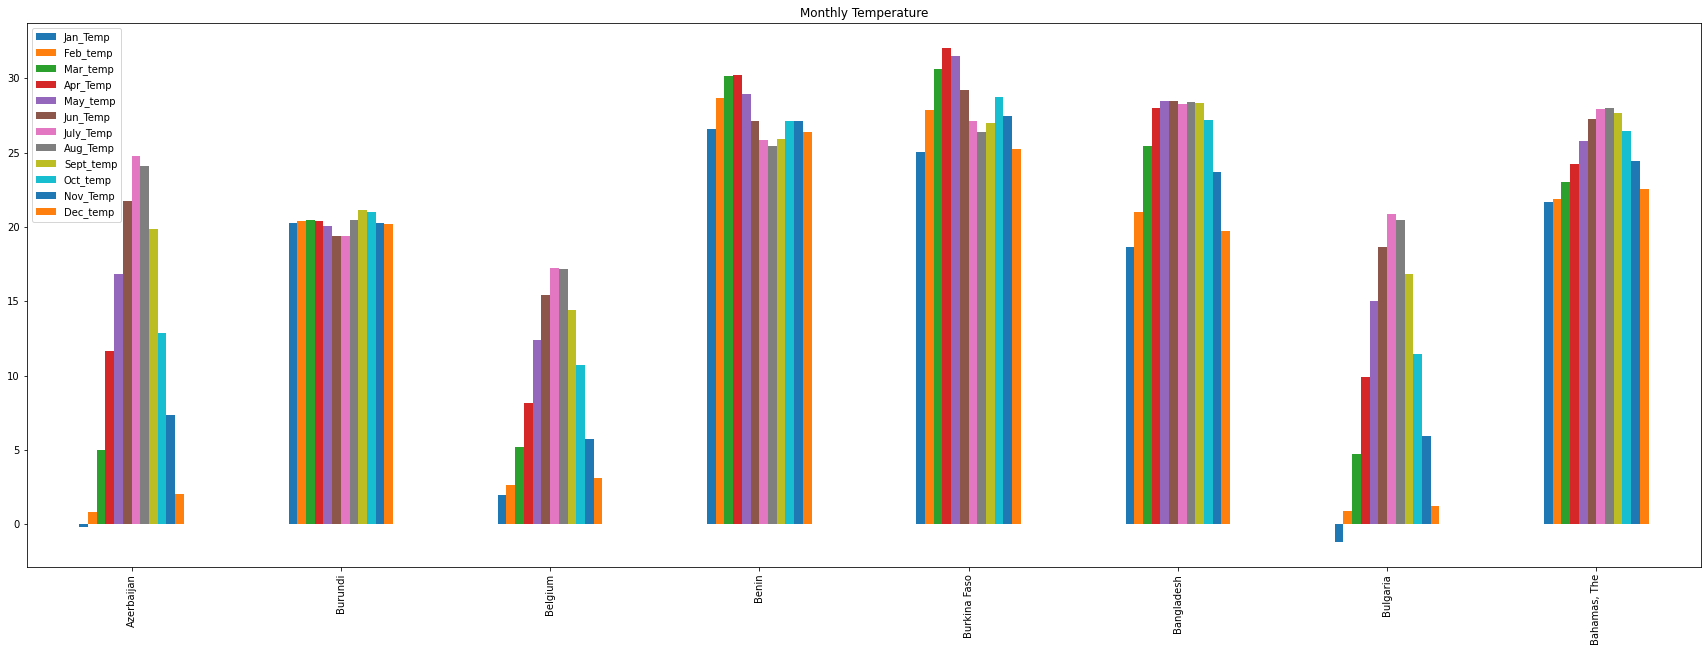

In [41]:
temperatureDFV3.iloc[8:16].plot.bar(rot=90, figsize=(30,10))
plt.ticklabel_format(style='plain', axis='y')
plt.title('Monthly Temperature')
plt.show()

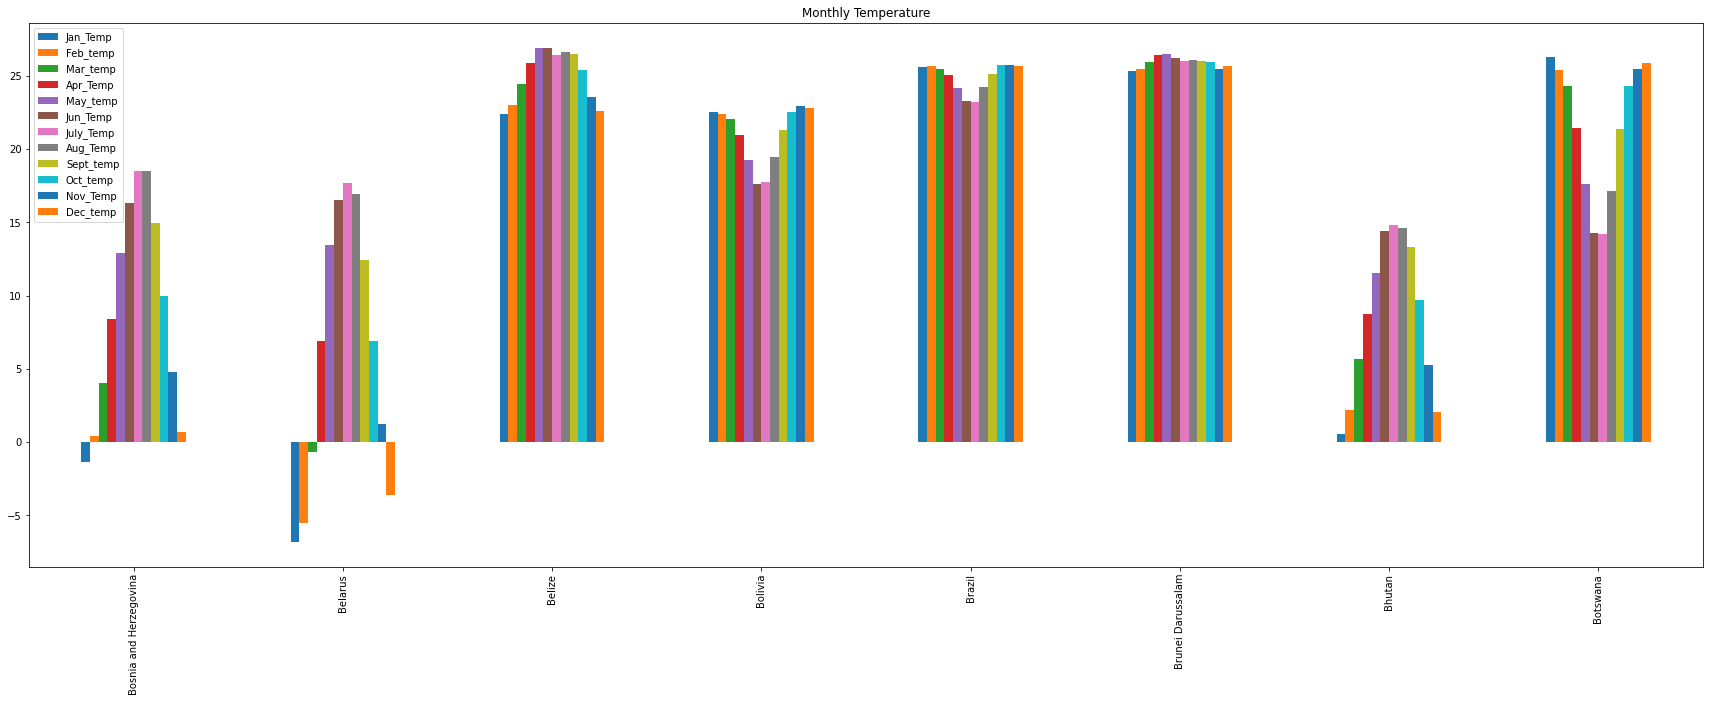

In [42]:
temperatureDFV3.iloc[16:24].plot.bar(rot=90, figsize=(30,10))
plt.ticklabel_format(style='plain', axis='y')
plt.title('Monthly Temperature')
plt.show()

**Plotting temperature data for specific countries**

In [68]:
IndiaTemp = pd.DataFrame(temperatureDFV3.loc['India'])
IndiaTempV1 = IndiaTemp.drop(['Country code'])
IndiaTempV2 = IndiaTempV1.rename(index={"Jan_Temp": "January", "Feb_temp": 'February', 'Mar_temp': 'March', 'Apr_Temp': 'April', 'May_temp': 'May', 'Jun_Temp': 'June', 
'July_Temp':"July", 'Aug_Temp': 'August', 'Sept_temp': 'September', 'Oct_temp': 'October',  'Nov_Temp': 'November', 'Dec_temp': 'December'})

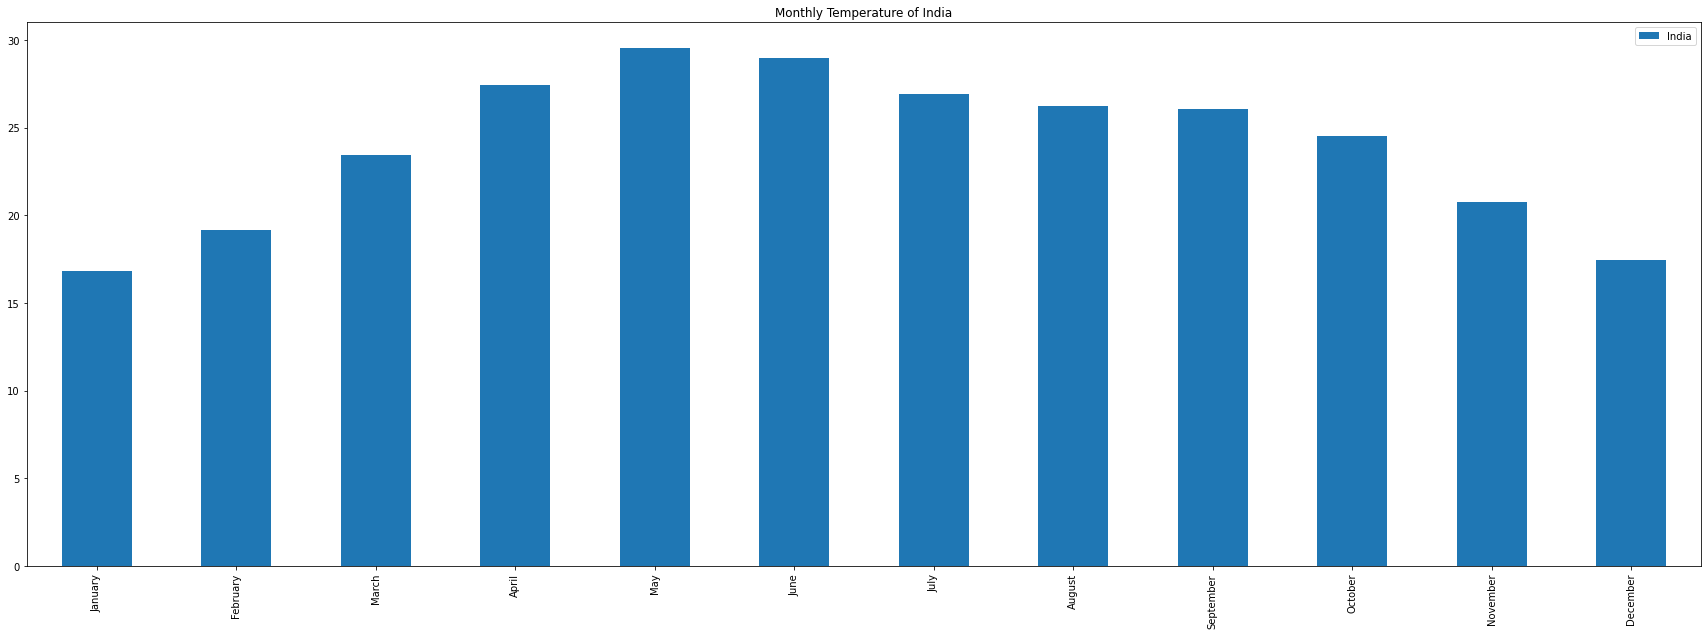

In [66]:
IndiaTempV2.plot.bar(rot=90, figsize=(30,10))
plt.ticklabel_format(style='plain', axis='y')
plt.title('Monthly Temperature of India')
plt.show()

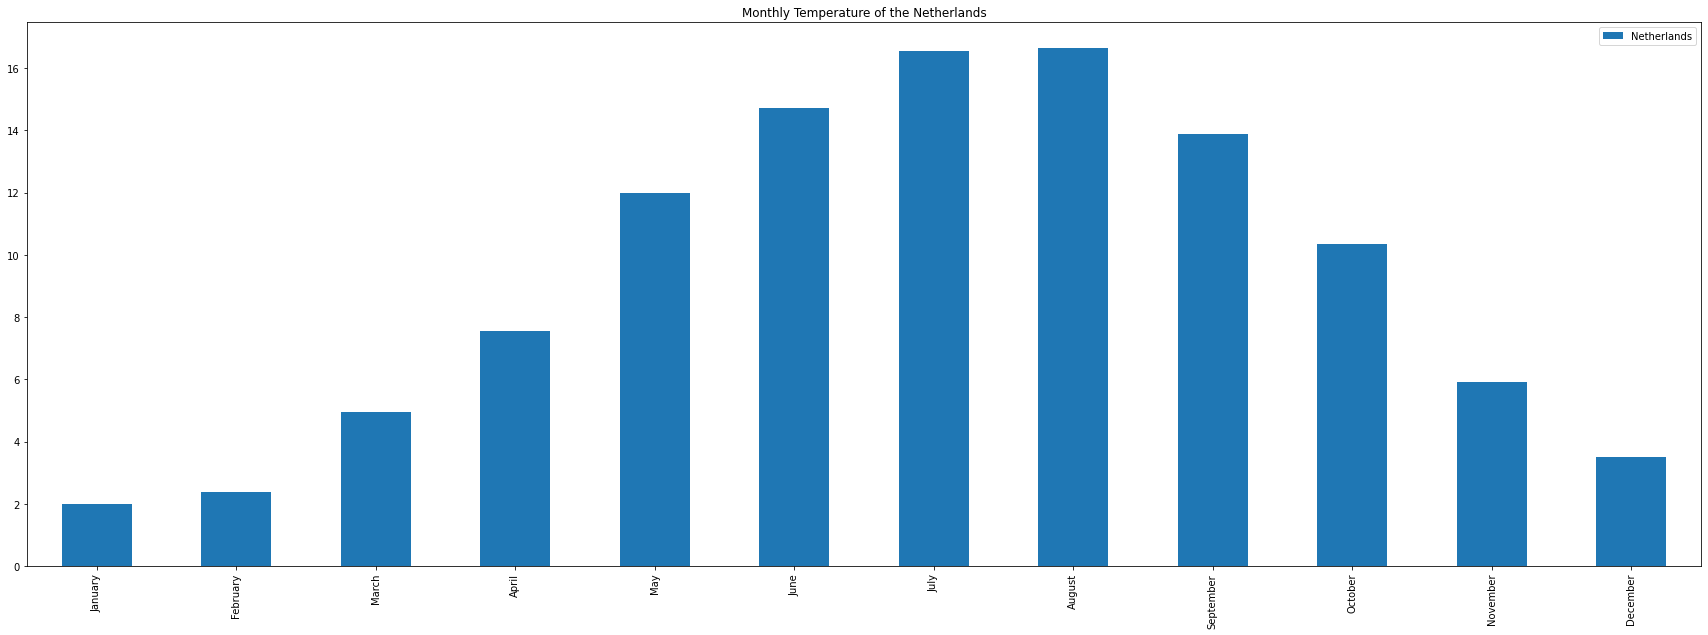

In [67]:
NetherlandTemp = pd.DataFrame(temperatureDFV3.loc['Netherlands'])
NetherlandTempV1 = NetherlandTemp.drop(['Country code'])
NetherlandTempV2 = NetherlandTempV1.rename(index={"Jan_Temp": "January", "Feb_temp": 'February', 'Mar_temp': 'March', 'Apr_Temp': 'April', 'May_temp': 'May', 'Jun_Temp': 'June', 
'July_Temp':"July", 'Aug_Temp': 'August', 'Sept_temp': 'September', 'Oct_temp': 'October',  'Nov_Temp': 'November', 'Dec_temp': 'December'})

NetherlandTempV2.plot.bar(rot=90, figsize=(30,10))
plt.ticklabel_format(style='plain', axis='y')
plt.title('Monthly Temperature of the Netherlands')
plt.show()

**Precipitation data for different countries**

In [72]:
# Country Precipitation
Country_precipitation_DF = Country_precipitation.rename(columns={'ISO_3DIGIT': 'Country code'})
Country_precipitation_DFV1 = Country_precipitation_DF.merge(Country_code_namesDF, how='left')
# Drop duplicates
Country_precipitation_DFV2 = Country_precipitation_DFV1.drop_duplicates()
Country_precipitation_DFV2.head()

,Country code,Jan_precip,Feb_precip,Mar_precip,Apr_precip,May_precip,Jun_precip,July_precip,Aug_precip,Sept_precip,Oct_precip,Nov_precip,Dec_precip,Annual_precip,Country name
0,AFG,43.275641,49.184578,64.971418,49.406624,24.182488,4.559185,8.034326,7.736403,3.667420,9.355273,15.409127,31.539374,311.321856,Afghanistan
58,AGO,154.987404,148.544214,169.914693,109.072267,15.142675,0.372332,0.321137,3.413405,20.102274,69.766698,144.510161,155.158423,991.305683,Angola
116,ALB,107.999418,102.625834,93.433083,86.162500,74.273917,54.579168,39.075000,45.696333,67.568500,105.261417,138.264167,138.295834,1053.235184,Albania
174,ARE,5.955387,22.178000,16.587609,8.961470,1.080574,1.094061,2.284059,1.405504,0.495943,0.428552,1.740576,5.600291,67.812025,United Arab Emirates
232,ARG,68.370440,63.654088,69.531037,46.481148,36.282154,28.080046,25.894385,24.096768,30.073554,47.715487,55.566664,63.300102,559.045871,Argentina


In [71]:
precipitationDF = Country_precipitation_DFV2.rename(columns={'Country name': ''})
precipitationDFV1 = precipitationDF.set_index(precipitationDF.iloc[:, -1])
precipitationDFV2 = precipitationDFV1.drop(precipitationDFV1.columns[-1], axis=1)
precipitationDFV3 = precipitationDFV2.drop(precipitationDFV2.columns[-1], axis=1)
precipitationDFV3.head()

,Country code,Jan_precip,Feb_precip,Mar_precip,Apr_precip,May_precip,Jun_precip,July_precip,Aug_precip,Sept_precip,Oct_precip,Nov_precip,Dec_precip
,,,,,,,,,,,,,
Afghanistan,AFG,43.275641,49.184578,64.971418,49.406624,24.182488,4.559185,8.034326,7.736403,3.667420,9.355273,15.409127,31.539374
Angola,AGO,154.987404,148.544214,169.914693,109.072267,15.142675,0.372332,0.321137,3.413405,20.102274,69.766698,144.510161,155.158423
Albania,ALB,107.999418,102.625834,93.433083,86.162500,74.273917,54.579168,39.075000,45.696333,67.568500,105.261417,138.264167,138.295834
United Arab Emirates,ARE,5.955387,22.178000,16.587609,8.961470,1.080574,1.094061,2.284059,1.405504,0.495943,0.428552,1.740576,5.600291
Argentina,ARG,68.370440,63.654088,69.531037,46.481148,36.282154,28.080046,25.894385,24.096768,30.073554,47.715487,55.566664,63.300102


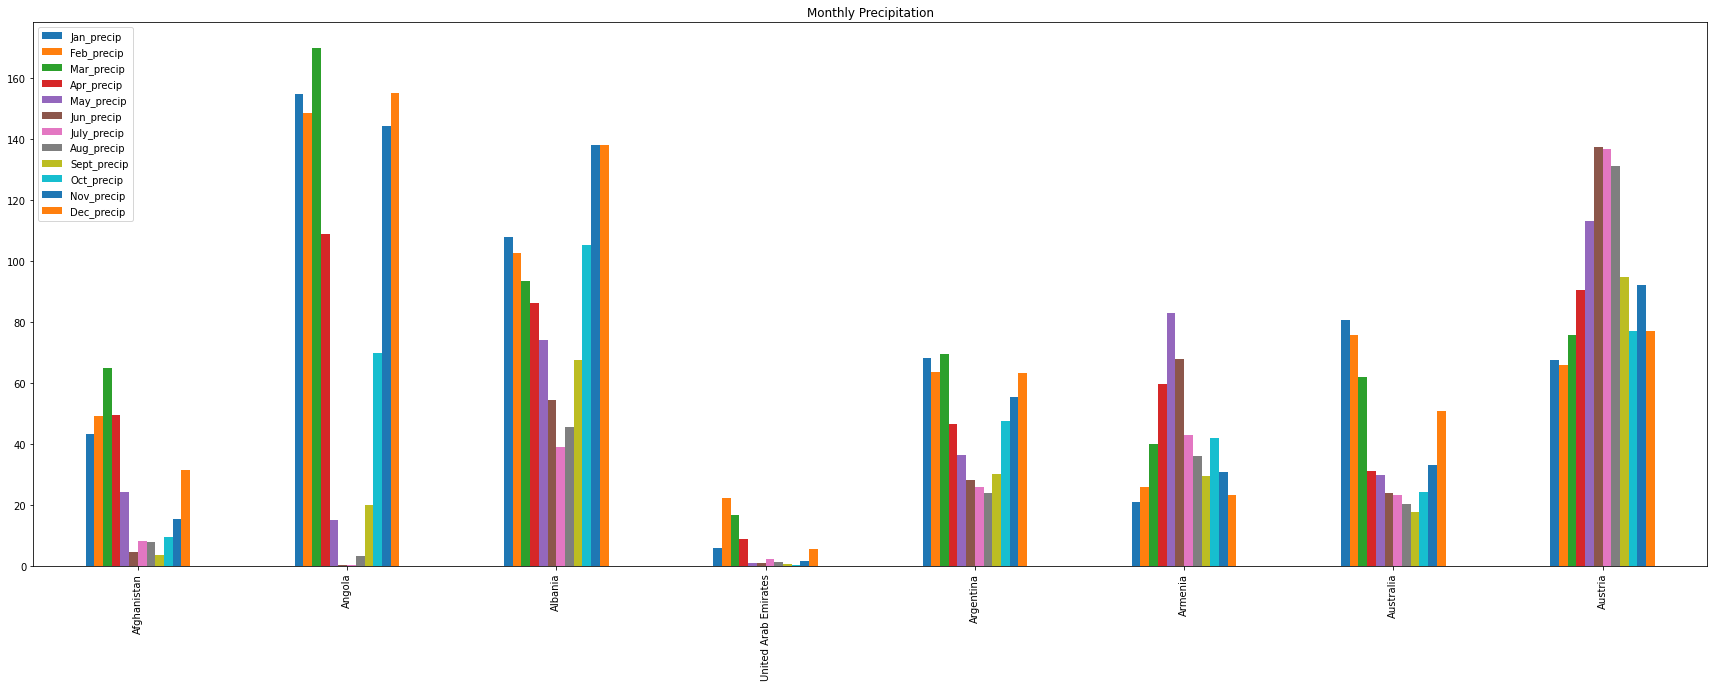

In [74]:
precipitationDFV3.iloc[:8].plot.bar(rot=90, figsize=(30,10))
plt.ticklabel_format(style='plain', axis='y')
plt.title('Monthly Precipitation')
plt.show()

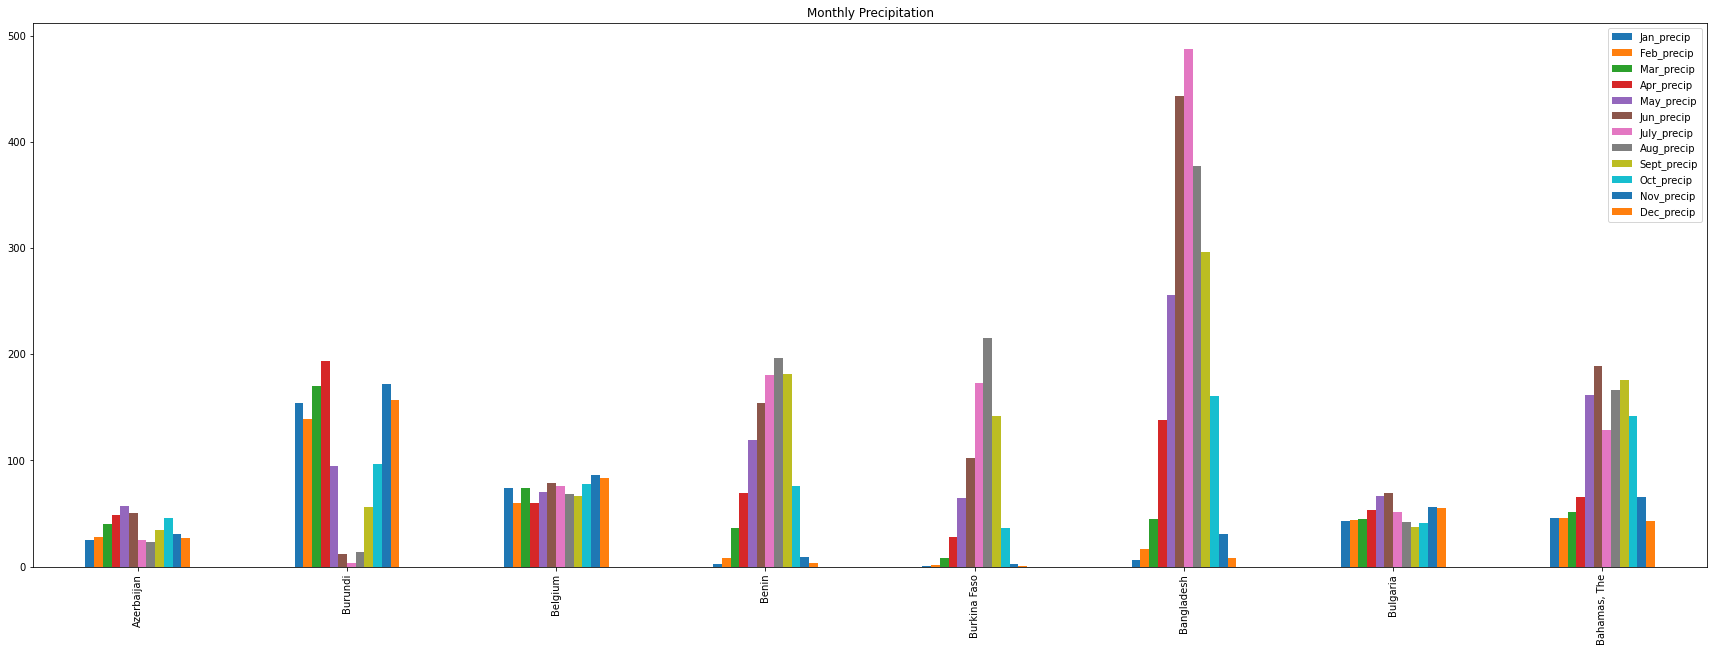

In [75]:
precipitationDFV3.iloc[8:16].plot.bar(rot=90, figsize=(30,10))
plt.ticklabel_format(style='plain', axis='y')
plt.title('Monthly Precipitation')
plt.show()

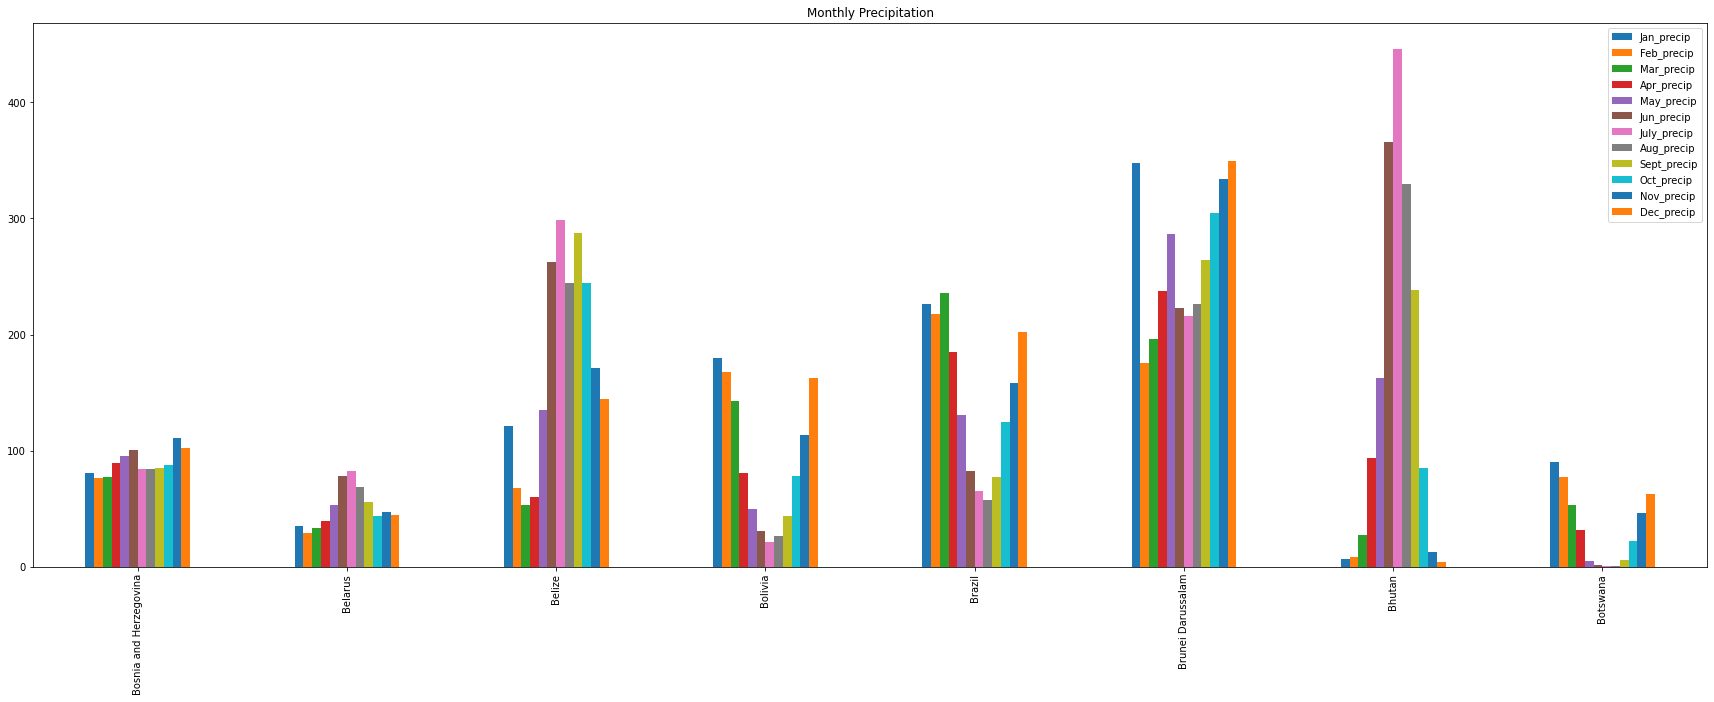

In [76]:
precipitationDFV3.iloc[16:24].plot.bar(rot=90, figsize=(30,10))
plt.ticklabel_format(style='plain', axis='y')
plt.title('Monthly Precipitation')
plt.show()

**Plotting precipitation for specific countries**

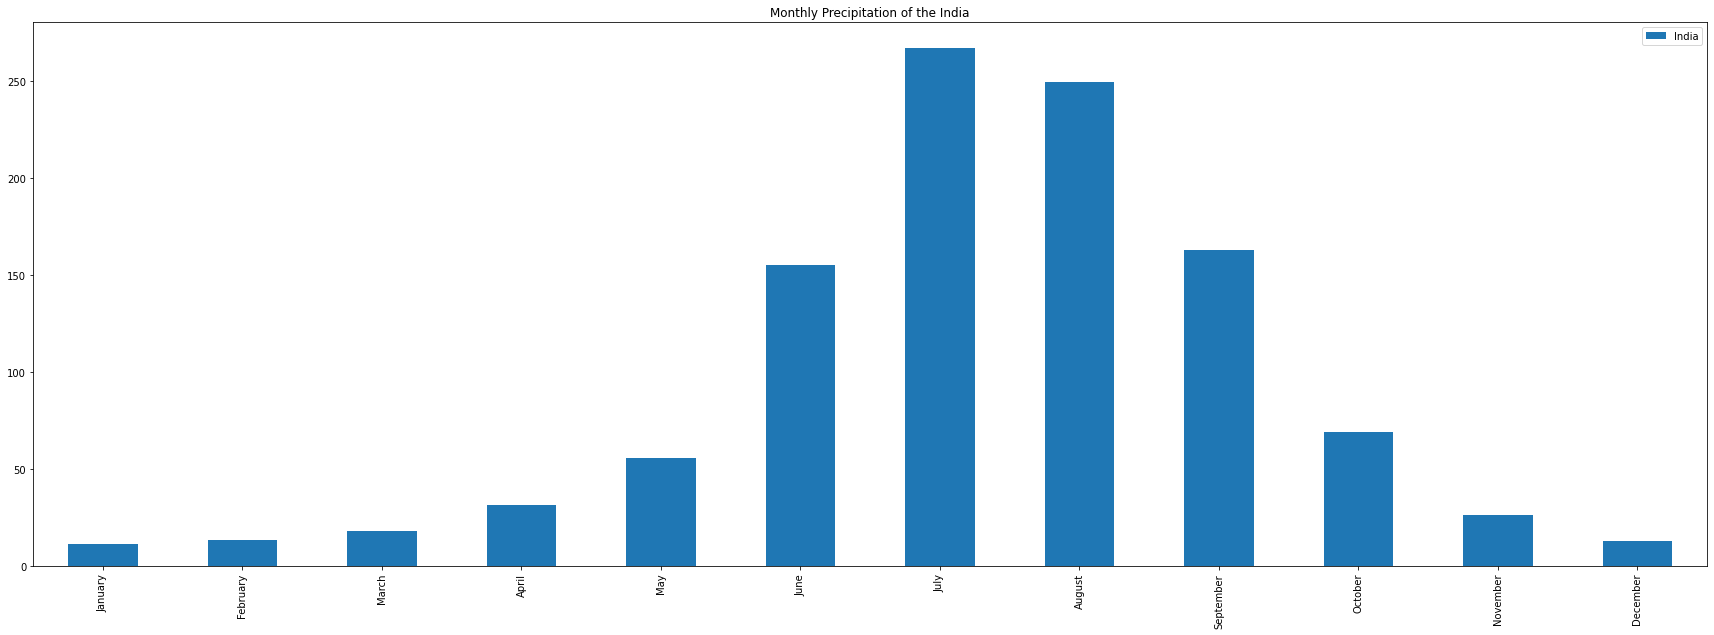

In [82]:
IndiaPrecip = pd.DataFrame(precipitationDFV3.loc['India'])
IndiaPrecipV1 = IndiaPrecip.drop(['Country code'])
IndiaPrecipV1
IndiaPrecipV2 = IndiaPrecipV1.rename(index={"Jan_precip": "January", "Feb_precip": 'February', 'Mar_precip': 'March', 'Apr_precip': 'April', 'May_precip': 'May', 'Jun_precip': 'June', 
'July_precip':"July", 'Aug_precip': 'August', 'Sept_precip': 'September', 'Oct_precip': 'October',  'Nov_precip': 'November', 'Dec_precip': 'December'})

IndiaPrecipV2.plot.bar(rot=90, figsize=(30,10))
plt.ticklabel_format(style='plain', axis='y')
plt.title('Monthly Precipitation of the India')
plt.show()

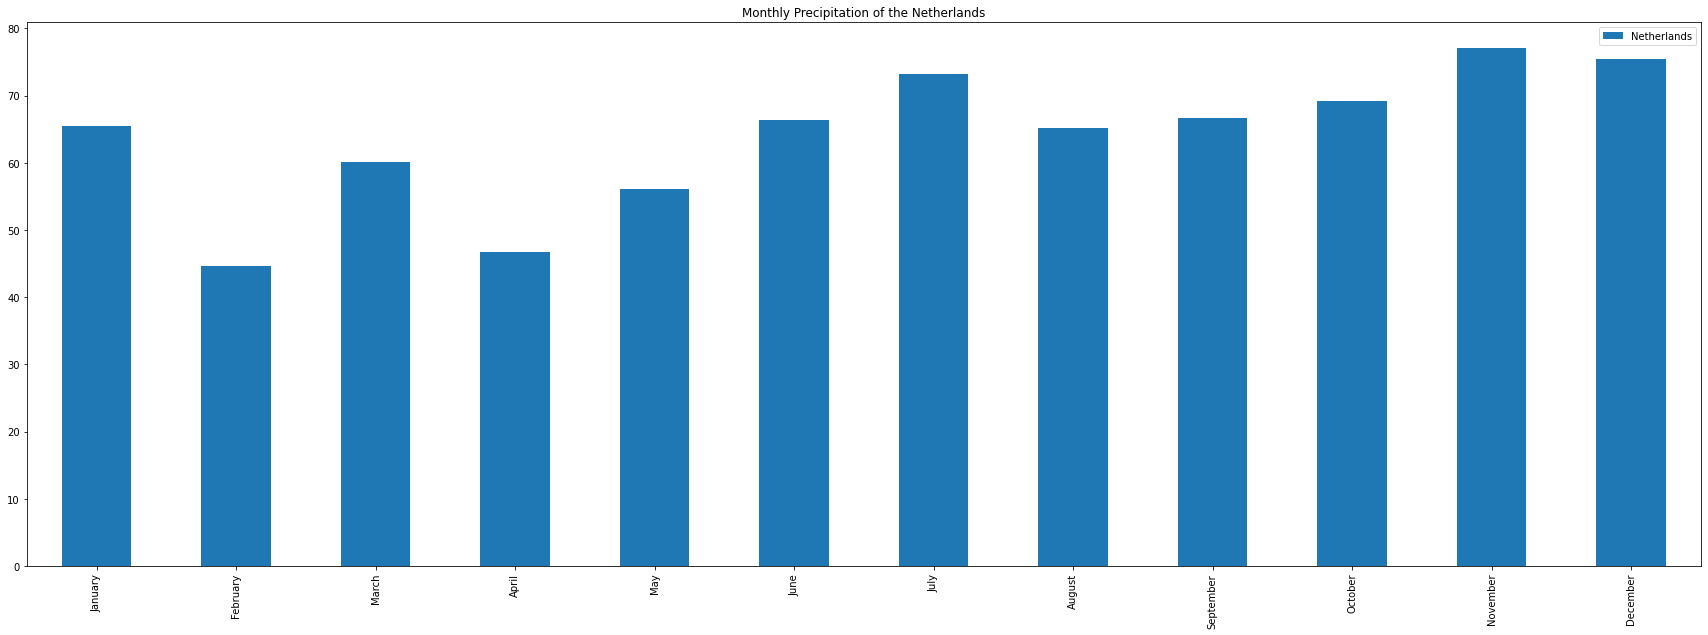

In [83]:
NetherlandsPrecip = pd.DataFrame(precipitationDFV3.loc['Netherlands'])
NetherlandsPrecipV1 = NetherlandsPrecip.drop(['Country code'])

NetherlandsPrecipV2 = NetherlandsPrecipV1.rename(index={"Jan_precip": "January", "Feb_precip": 'February', 'Mar_precip': 'March', 'Apr_precip': 'April', 'May_precip': 'May', 'Jun_precip': 'June', 
'July_precip':"July", 'Aug_precip': 'August', 'Sept_precip': 'September', 'Oct_precip': 'October',  'Nov_precip': 'November', 'Dec_precip': 'December'})

NetherlandsPrecipV2.plot.bar(rot=90, figsize=(30,10))
plt.ticklabel_format(style='plain', axis='y')
plt.title('Monthly Precipitation of the Netherlands')
plt.show()

**Precipitation to Temperature plots - India**

In [89]:
IndiaPrecip_compareDF = IndiaPrecipV2
IndiaTemp_compareDF = IndiaTempV2

In [99]:
India_preci_temp_DF = pd.merge(IndiaPrecip_compareDF, IndiaTemp_compareDF, left_index=True, right_index=True)
India_preci_temp_DFV1 = India_preci_temp_DF.rename(columns={'India_x':'Precipitation', 'India_y': 'Temperature'})
India_preci_temp_DFV1

,Precipitation,Temperature
January,11.2114,16.8414
February,13.219,19.1491
March,18.2215,23.45
April,31.463,27.4321
May,55.5254,29.528
June,155.401,28.9643
July,266.925,26.9129
August,249.321,26.2309
September,163.085,26.0513
October,68.8583,24.5157


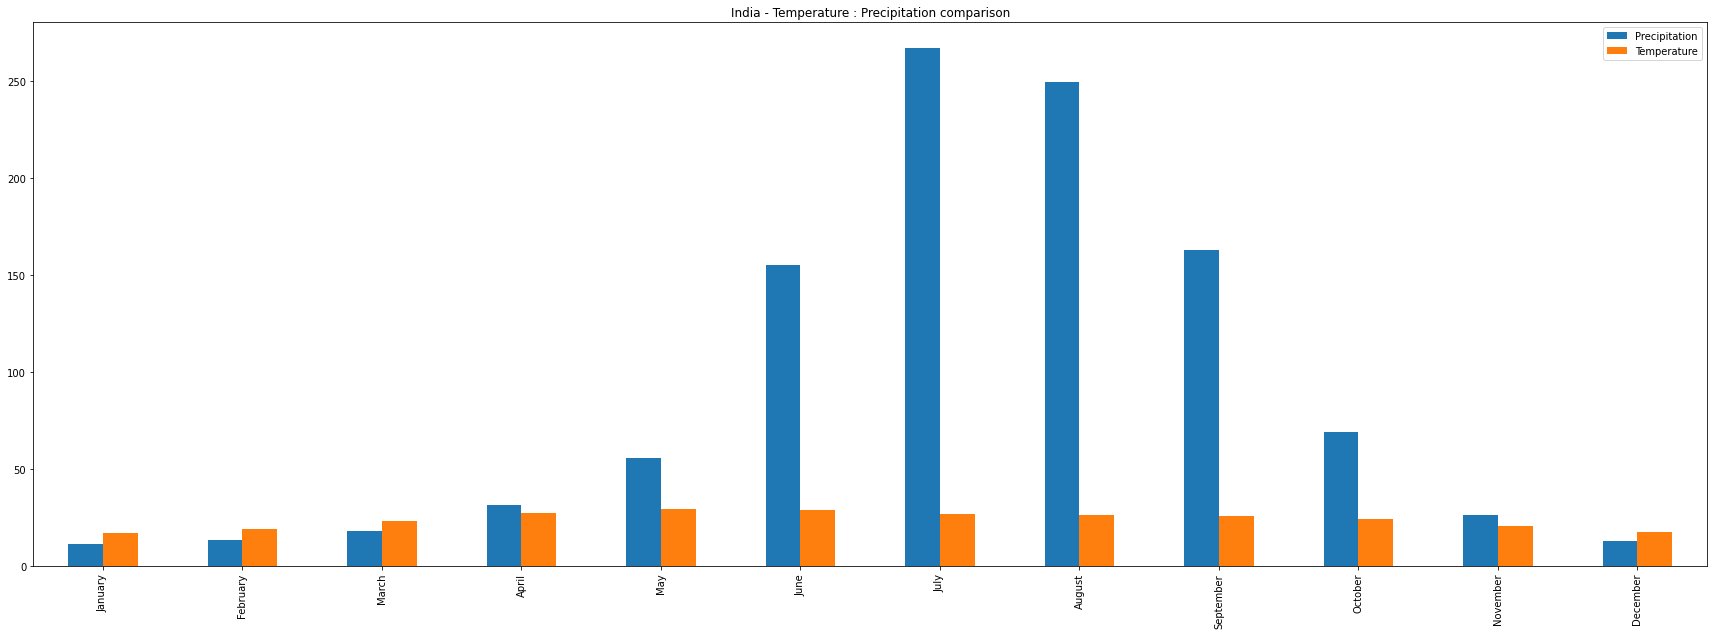

In [100]:
India_preci_temp_DFV1.plot.bar(rot=90, figsize=(30,10))
plt.ticklabel_format(style='plain', axis='y')
plt.title('India - Temperature : Precipitation comparison')
plt.show()

**Temperature to Precipitation - The Netherlands**

In [102]:
NetherlandsPrecip_compareDF = NetherlandsPrecipV2
NetherlandsTemp_compareDF = NetherlandTempV2

In [106]:
Netherlands_preci_temp_DF = pd.merge(NetherlandsPrecip_compareDF, NetherlandsTemp_compareDF, left_index=True, right_index=True)
Netherlands_preci_temp_DFV1 = Netherlands_preci_temp_DF.rename(columns={'Netherlands_x':'Precipitation', 'Netherlands_y': 'Temperature'})
Netherlands_preci_temp_DFV1

,Precipitation,Temperature
January,65.5065,1.99377
February,44.5928,2.37355
March,60.1059,4.94501
April,46.7444,7.56291
May,56.0627,11.9836
June,66.4131,14.7219
July,73.1975,16.5509
August,65.1416,16.6399
September,66.675,13.8956
October,69.2403,10.3474


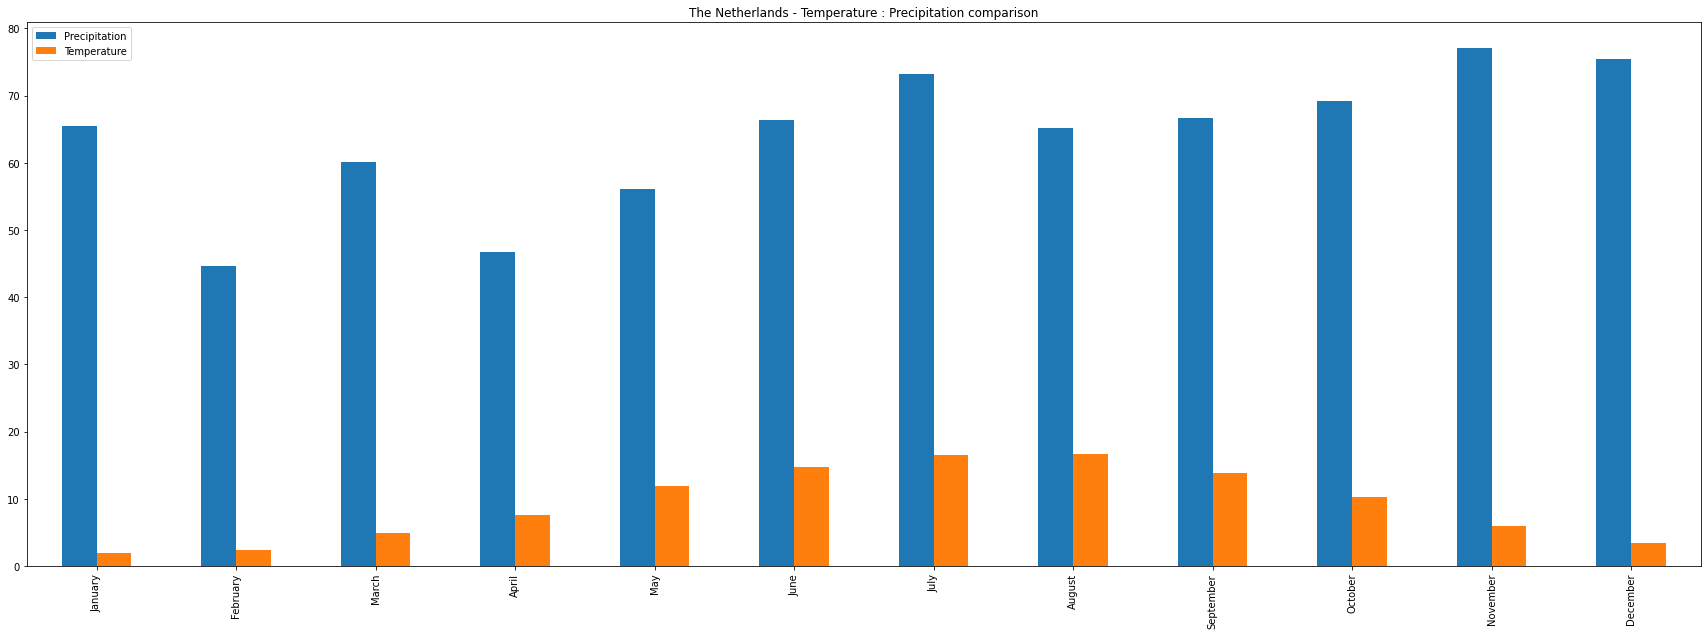

In [108]:
Netherlands_preci_temp_DFV1.plot.bar(rot=90, figsize=(30,10))
plt.ticklabel_format(style='plain', axis='y')
plt.title('The Netherlands - Temperature : Precipitation comparison')
plt.show()